## Raw code for AWG pulse-shaping and waveforms

In [ ]:
#use SCPI to talk through visa
import visa
rm = visa.ResourceManager()
rm.list_resources()
AWG = rm.open_resource('TCPIP::169.254.106.135::INSTR')
print(AWG.query("*IDN?"))
# AWG.write("OUTPUT1:STAT OFF")

In [ ]:
# clear the sequence list and waveform list (NOT ALWAYS A GOOD IDEA! BE CAREFUL!)
awg.clearSequenceList()
awg.clearWaveformList()

In [ ]:
# Let us make a waveform for channels
import broadbean as bb
import matplotlib.pyplot as plt
import numpy as np

dur = 20e-6
SR = 2.5e9
npts = dur*SR # Sampling number per waveform. min length allowed is 2400 points

ampl = 100e-3
sigma = 300e-9
tR = 2400e-9
tF = 5400e-9

# mysine = bb.PulseAtoms.sine(freq=2*SR/npts, ampl=pulseAmpl, off=0, phase=0, SR=SR, npts=npts)
# myramp = bb.PulseAtoms.ramp(start=0, stop=pulseAmpl, SR=SR, npts=npts)
extG_rais = bb.PulseAtoms.gaussian(ampl=ampl, sigma=sigma, mu=tR-dur/2, offset=0, SR=SR, npts=npts)
extG_bulk = ampl* np.concatenate((np.zeros(int(tR*SR)), np.ones(int((tF-tR)*SR)), np.zeros(int((dur-tF)*SR))))
extG_fall = bb.PulseAtoms.gaussian(ampl=ampl, sigma=sigma, mu=tF-dur/2, offset=0, SR=SR, npts=npts)

extGaussian = np.zeros(int(npts))
for i in range(int(npts)):
    extGaussian[i] = max(extG_rais[i], extG_bulk[i], extG_fall[i])

time = np.linspace(0, dur, npts, endpoint=False)

# Plot the waveform data
xscale = 1e-6 # set t to us scale
plt.close()
plt.plot(time/xscale, extGaussian)
plt.grid(True)
plt.title('Waveform')
plt.xlim(0-dur/xscale*0.05, dur/xscale*1.05)
plt.xlabel("time (us)")
plt.ylim(0-pulseAmpl*0.05, ampl*1.05)
plt.ylabel("amplitude (abs)")
plt.show()

# prepare the waveform data
m1 = np.concatenate((np.ones(int(npts/2)), np.zeros(int(npts/2)))) #markers 1
m2 = np.concatenate((np.zeros(int(npts/2)), np.ones(int(npts/2)))) #markers 2
extGaussianWv = np.array([extGaussian, m1, m2])

In [ ]:
# The .wfmx file needs a name in the memory of the instrument
# The name of the waveform in the waveform list is that same name
# with no .wfmx extension

filename = 'probe.wfmx'

# now compile the binary file
wfmx_file = awg.makeWFMXFile(extGaussianWv, 1)

# and send it and load it into memory
awg.sendWFMXFile(wfmx_file, filename)
awg.loadWFMXFile(filename)

# The waveform is now in the waveform list
awg.waveformList 

In [ ]:
# now assign it to channel 1
awg.ch2.setWaveform(awg.waveformList[0])

# Switch channel 1 on
awg.ch1.state(1)
awg.ch2.state(1)
# Start outputting...
awg.play()

## Working space for class-module

In [1]:
import broadbean as bb
import matplotlib.pyplot as plt
import numpy as np

dur = 20e-6
SR = 2.5e9
npts = dur*SR # Sampling number per waveform. min length allowed is 2400 points

class makeWaveform:

    def extGaussian(ampl=200e-3, sigma=500e-9, tR=3500e-9, tF=5500e-9):
        """
        Returns an extended Gaussian

        """
        extG_rais = bb.PulseAtoms.gaussian(ampl=ampl, sigma=sigma, mu=tR-dur/2, offset=0, SR=SR, npts=npts)
        extG_bulk = ampl* np.concatenate((np.zeros(int(tR*SR)), np.ones(int((tF-tR)*SR)), np.zeros(int((dur-tF)*SR))))
        extG_fall = bb.PulseAtoms.gaussian(ampl=ampl, sigma=sigma, mu=tF-dur/2, offset=0, SR=SR, npts=npts)

        extGaussian = np.zeros(int(npts))
        for i in range(int(npts)):
            extGaussian[i] = max(extG_rais[i], extG_bulk[i], extG_fall[i])

        return extGaussian

    def makeWaveformWMarker(waveform, m1, m2):
        return np.array([waveform, m1, m2])

    def timeForPlot():
        return np.linspace(0, dur, npts, endpoint=False)
    
    def viewWaveform(time, waveform, tscale=1e-6):
        yscale = max(waveform)
        tscale = 1e-6
        plt.close()
        plt.plot(time/tscale, waveform)
        plt.grid(True)
        plt.title('Waveform')
        plt.xlim(0-dur/tscale*0.05, dur/tscale*1.05)
        plt.xlabel("time (us)")
        plt.ylim(0-yscale*0.05, yscale*1.05)
        plt.ylabel("amplitude (V)")
        plt.show()

class loadWaveform:

    def writeFile (filename, waveform, scaleParam)
        # The .wfmx file needs a name in the memory of the instrument
        # The name of the waveform in the waveform list is that same name
        # with no .wfmx extension

        wfmx_file = awg.makeWFMXFile(waveform, 1/scaleParam) # now compile the binary file
        awg.sendWFMXFile(wfmx_file, filename)
        awg.loadWFMXFile(filename) # and send it and load it into memory

        return awg.waveformList # The waveform is now in the waveform list

    def assignWaveform (waveformList, ) #dictonary?
# now assign it to channel 1
        awg.ch2.setWaveform(awg.waveformList[0])

        # Switch channel 1 on
        awg.ch1.state(1)
        awg.ch2.state(1)
        # Start outputting...
        awg.play()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


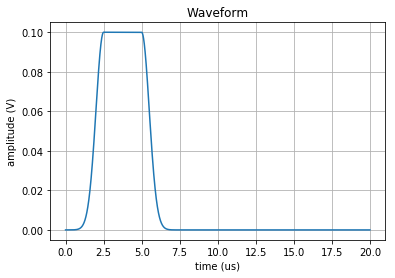

NameError: name 'extGaussian' is not defined

In [2]:
time = makeWaveform.timeForPlot()
extGaussian2 = makeWaveform.extGaussian(ampl=100e-3, sigma=500e-9, tR=2500e-9, tF=5000e-9)
#TODO: error at tR=2500ns and tF=5500ns, IndexError: index 49999 is out of bounds for axis 0 with size 49999
makeWaveform.viewWaveform(time, extGaussian2, tscale=1e-6)

loadWaveform.writeFile('probe.wfmx', extGaussian2, 1)


# prepare the waveform data
m1 = np.concatenate((np.ones(int(npts/2)), np.zeros(int(npts/2)))) #markers 1
m2 = np.concatenate((np.zeros(int(npts/2)), np.ones(int(npts/2)))) #markers 2
extGaussianWv = np.array([extGaussian, m1, m2])